In [68]:
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
import pandas as pd

In [69]:
x1=np.random.randint(1,40,200000)
x2=np.random.randint(1,40,200000)

y=4+2*x1+3*x2+3*np.random.random(200000)

In [70]:
w=np.random.random(3)
w

array([0.69207647, 0.53188565, 0.7367267 ])

In [71]:
x=pd.DataFrame({'const':np.ones(200000),'x1':x1,'x2':x2})
x

,const,x1,x2
0,1.0,18,32
1,1.0,13,10
2,1.0,29,28
3,1.0,23,23
4,1.0,7,22
...,...,...,...
199995,1.0,17,38
199996,1.0,29,11
199997,1.0,26,5
199998,1.0,38,29


## Estimated paramter values from sklearn

In [72]:
lr=LinearRegression()
lr.fit(x.iloc[:,1:],y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
w_sklearn=[lr.intercept_]+list(lr.coef_)
w_sklearn

[5.498211884506063, 2.00003866089022, 3.0000049657634755]

## Paramter Estimation with Gradient Descent

In [74]:
def myPred(features,weights):
    preds=np.dot(features,weights)
    return (preds)

myPred(x,w)

array([33.84127261, 14.97385692, 36.74510794, ..., 18.20473684,
       42.26880548, 23.32576318])

In [75]:
def mypred(features,weights):
    
    preds=np.dot(features,weights)
    return(preds)

In [76]:
mypred(x,w).shape

(200000,)

In [77]:
def myerror(target,features,weights):
    
    preds=mypred(features,weights)
    errors=target-preds
    return(errors)

In [78]:
myerror(y,x,w)

array([103.99039322,  46.5690048 , 109.94644127, ...,  53.35803701,
       125.20246927,  73.72224685])

In [79]:
def mycost(target,features,weights):
    
    errors=myerror(target,features,weights)
    cost=np.dot(errors.T,errors)
    return(cost)


In [80]:
mycost(y,x,w)

1447693835.2677867

In [81]:
def gradient(target,features,weights):
    
    errors=myerror(target,features,weights)
    grad=-np.dot(features.T,errors)/features.shape[0]
    return(grad)

In [82]:
gradient(y,x,w)

array([  -79.48073528, -1777.02331921, -1876.38520375])

In [83]:
def my_lr_gd(target,features,learning_rate,num_steps):
    
    weights=np.random.random(features.shape[1])
    cost=[]
    for i in range(num_steps):
        
        weights-=learning_rate*gradient(target,features,weights)
        
        cost.append(mycost(target,features,weights))
    return(cost,weights)

In [84]:
cost_gd,w_gd=my_lr_gd(y,x,.001,1000)

In [85]:
w_gd

array([1.27526046, 2.0912894 , 3.09101588])

In [86]:
w_sklearn/w_gd

array([4.31144228, 0.95636628, 0.97055631])

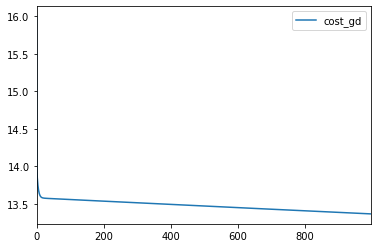

In [87]:
np.log(pd.DataFrame({'cost_gd':cost_gd})).plot()

In [88]:
def my_lr_sgd(target,features,learning_rate,num_steps):
    cost=[]
    weights=np.random.random(features.shape[1])
    
    for i in np.arange(num_steps):
        rand_ind=np.random.choice(range(features.shape[0]),10)
        target_sub=target[rand_ind]
        features_sub=features.iloc[rand_ind,:]
        
        weights -= learning_rate*gradient(target_sub,features_sub,weights)
        
        cost.append(mycost(target,features,weights))
            
    return(cost,weights)

In [89]:
cost_sgd,w_sgd=my_lr_sgd(y,x,.001,1000)

In [90]:
w_sgd

array([1.46815462, 2.07899102, 3.10299668])

In [91]:
w_sklearn/w_sgd

array([3.74498149, 0.96202371, 0.96680895])

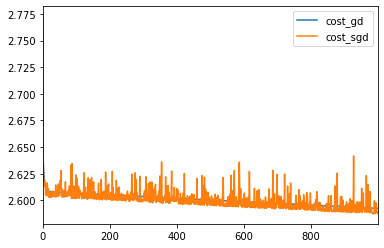

In [92]:
np.log(pd.DataFrame({'cost_gd':np.log(cost_gd),'cost_sgd':np.log(cost_sgd)})).plot()

In [93]:
def my_lr_mom(target,features,learning_rate,num_steps):
    cost=[]
    
    weights=np.random.random(features.shape[1])
    
    vw=np.zeros(features.shape[1])
    beta=0.9
    
    for i in np.arange(num_steps):
        rand_ind=np.random.choice(range(features.shape[0]),10)
        target_sub=target[rand_ind]
        features_sub=features.iloc[rand_ind,:]
        
        vw=beta*vw+(1-beta)*gradient(target_sub,features_sub,weights)
        
        vw_a=vw/(1-beta**(i+1))
        
        weights -= learning_rate*vw_a
        cost.append(mycost(target,features,weights))
            
    return(cost,weights)

In [94]:
cost_mom,w_mom=my_lr_mom(y,x,.01,1000)

In [95]:
w_mom

array([12.90962329,  1.81004592,  2.82816057])

In [96]:
w_sklearn/w_mom

array([0.42590026, 1.1049657 , 1.0607619 ])

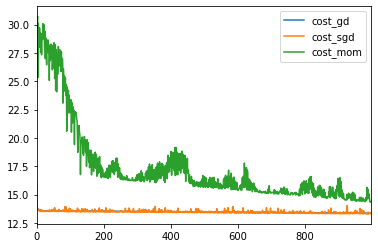

In [97]:
np.log(pd.DataFrame({'cost_gd':cost_gd,'cost_sgd':cost_sgd,'cost_mom':cost_mom})).plot()

In [98]:
def my_lr_rms(target,features,learning_rate,num_steps):
    cost=[]
    
    weights=np.random.random(features.shape[1])
    
    sw=np.zeros(features.shape[1])
    
    beta=0.99
    
    
    for i in np.arange(num_steps):
        rand_ind=np.random.choice(range(features.shape[0]),10)
        target_sub=target[rand_ind]
        features_sub=features.iloc[rand_ind,:]
        
        gd=gradient(target_sub,features_sub,weights)
        sw=beta*sw+(1-beta)*(gd**2)
        
        sw_a=sw/(1-beta**(i+1))
        
        weights -= learning_rate*(gd/(np.sqrt(sw_a)+1e-15))
        cost.append(mycost(target,features,weights))
            
    return(cost,weights)

In [99]:
cost_rms,w_rms=my_lr_rms(y,x,.1,1000)

In [100]:
w_rms

array([5.55033119, 1.98184869, 2.98132785])

In [101]:
w_sklearn/w_rms

array([0.9906097 , 1.00917828, 1.0062647 ])

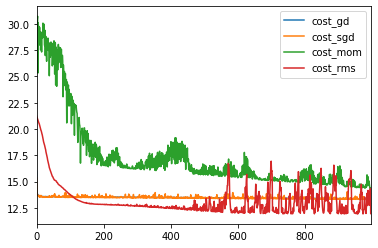

In [102]:
np.log(pd.DataFrame({'cost_gd':cost_gd,'cost_sgd':cost_sgd,'cost_mom':cost_mom,'cost_rms':cost_rms})).plot()

In [103]:
def my_lr_adam(target,features,learning_rate,num_steps):
    cost=[]
    
    weights=np.random.random(features.shape[1])
    sw=np.zeros(features.shape[1])
    vw=np.zeros(features.shape[1])
    beta1=0.9
    beta2=0.99
    
    
    for i in np.arange(num_steps):
        rand_ind=np.random.choice(range(features.shape[0]),10)
        target_sub=target[rand_ind]
        features_sub=features.iloc[rand_ind,:]
        
        gd=gradient(target_sub,features_sub,weights)
        vw=beta1*vw+(1-beta1)*gd
        sw=beta2*sw+(1-beta2)*(gd**2)
        
        vw_a=vw/(1-beta1**(i+1))
        sw_a=sw/(1-beta2**(i+1))
        
        weights -= learning_rate*(vw_a/(np.sqrt(sw_a)+1e-15))
        
        cost.append(mycost(target,features,weights))
            
    return(cost,weights)

In [104]:
cost_adam,w_adam=my_lr_adam(y,x,.1,1000)

In [105]:
w_adam

array([5.58599621, 1.96583295, 3.04094088])

In [106]:
w_sklearn/w_adam

array([0.98428493, 1.01740011, 0.98653841])

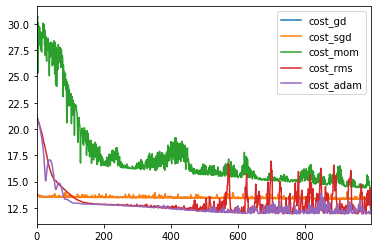

In [107]:
np.log(pd.DataFrame({'cost_gd':cost_gd,'cost_sgd':cost_sgd,'cost_mom':cost_mom,'cost_rms':cost_rms,'cost_adam':cost_adam})).plot()